
<h2 style="text-align: center;"><strong> Informe Exploratorio Proyecto Análisis de Engagement - FERIVA   </strong></h2>

<div style="height: 6px; display: flex; margin-bottom: 12px;">
  <div style="flex: 1; background-color: orange;"></div>
  <div style="flex: 1; background-color: violet;"></div>
  <div style="flex: 1; background-color: #006666;"></div>
</div>


## Carga de **Social Media Engagement Dataset** luego del ETL
<hr style="border: none; height: 5px; background-color: Orange;">




In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
df = pd.read_csv(r'C:\Users\Bruger\Desktop\Proyecto Redes\Dataset REDES\clean_social_media_dataset.csv')

# Verificar que se cargó bien
print(df.shape)
print(df.columns)


(10506, 29)
Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'language', 'text_content', 'hashtags', 'mentions', 'keywords',
       'topic_category', 'sentiment_score', 'sentiment_label', 'emotion_type',
       'toxicity_score', 'likes_count', 'shares_count', 'comments_count',
       'impressions', 'engagement_rate', 'brand_name', 'product_name',
       'campaign_name', 'campaign_phase', 'user_past_sentiment_avg',
       'user_engagement_growth', 'buzz_change_rate', 'city', 'country'],
      dtype='object')


## **Paso A** – Análisis de Distribución
<hr style="border: none; height: 5px; background-color: orange;">




### **Paso A - Agrupar** | Engagement Promedio por Variables Clave
En esta etapa se agruparon los datos por distintas variables clave para identificar patrones en el engagement promedio.

🔹 A.1 — Engagement promedio por plataforma
Se agruparon los posteos por (Instagram, Facebook, YouTube, etc.) y se calculó el promedio de engagement.

Insight:puede indicar una mayor interacción con contenido visual o de entretenimiento.

🔹 A.2 — Engagement promedio por día de la semana
Se analizaron los días de la semana con mayor rendimiento en términos de engagement promedio.

Insight: Se identificaron picos de engagement en ciertos días (por ejemplo, miércoles y viernes), útil para optimizar días de publicación.

🔹 A.3 — Engagement promedio por idioma
Se tomó el top 10 de idiomas con mayor engagement promedio para evaluar la efectividad según el idioma del contenido.

🔹A.4 Grafico Unificando los 3 pasos

Insight: Algunos idiomas reflejan mayor participación, lo que puede estar vinculado al tipo de audiencia o región cantidad de poblacion



In [ ]:
# A.1  Engagement promedio por plataforma
= df.groupby('platform')['engagement_rate'].mean().sort_values(ascending=False)
print(platform_engagement)


platform
Reddit       0.093460
Twitter      0.092896
Instagram    0.092783
Facebook     0.091636
Youtube      0.091532
Name: engagement_rate, dtype: float64


In [ ]:
# A.2 — Engagement promedio por día de la semana
day_engagement = df.groupby('day_of_week')['engagement_rate'].mean().sort_values()
print(day_engagement)


day_of_week
Monday       0.090277
Sunday       0.091240
Thursday     0.091595
Saturday     0.091753
Wednesday    0.093539
Friday       0.094262
Tuesday      0.094477
Name: engagement_rate, dtype: float64


In [ ]:
# A.3 — Engagement promedio por idioma
language_engagement = df.groupby('language')['engagement_rate'].mean().sort_values(ascending=False)
print(language_engagement)


language
HIN     0.096032
POR     0.093960
JPN     0.093686
ESP     0.093219
ENG     0.092717
FRA     0.092588
RUS     0.092177
CHI     0.090418
ARAB    0.090186
GER     0.089595
Name: engagement_rate, dtype: float64


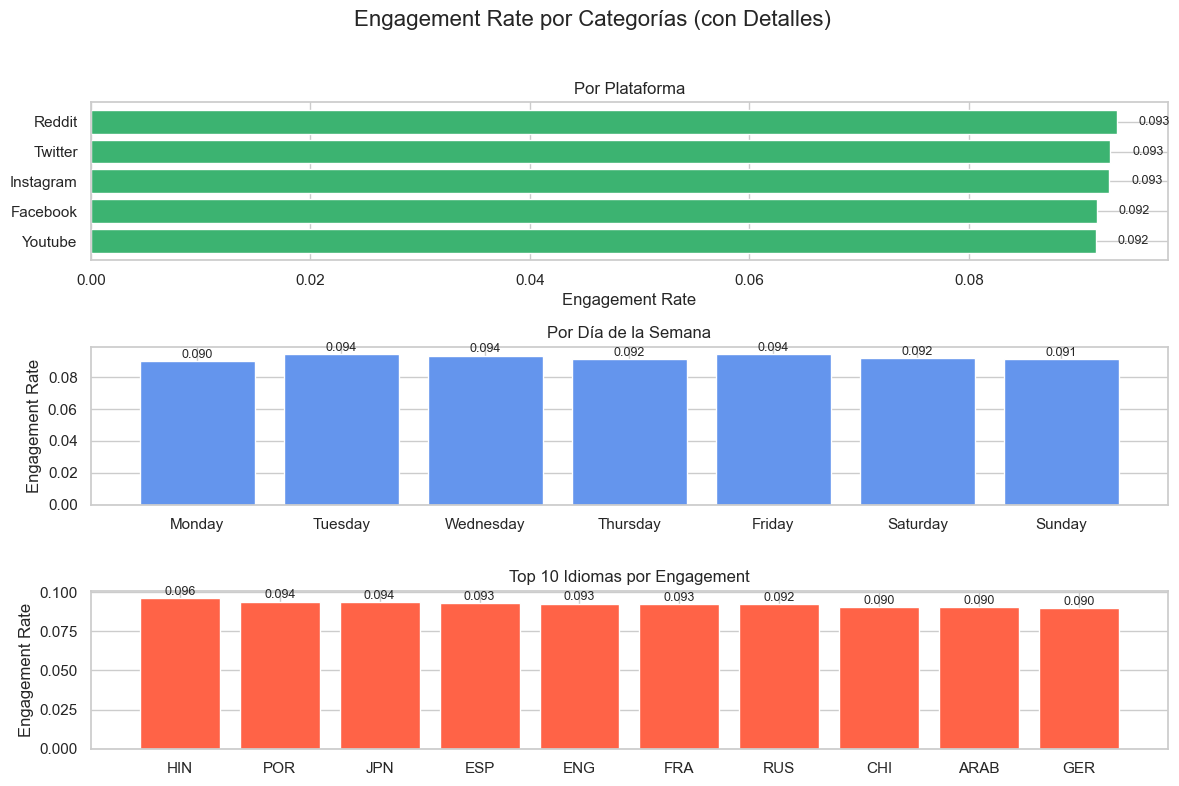

In [ ]:
# A.4 Grafico Unificando los 3 pasos

# Estilo visual
sns.set_theme(style='whitegrid')

# Crear figura
fig, axes = plt.subplots(3, 1, figsize=(12, 8))
fig.suptitle('Engagement Rate por Categorías (con Detalles)', fontsize=16)

# --- Gráfico 1: Plataforma ---
platform_engagement = df.groupby('platform')['engagement_rate'].mean().sort_values(ascending=True)
axes[0].barh(platform_engagement.index, platform_engagement.values, color='mediumseagreen')
axes[0].set_title('Por Plataforma')
axes[0].set_xlabel('Engagement Rate')

# Etiquetas numéricas
for i, v in enumerate(platform_engagement.values):
    axes[0].text(v + 0.002, i, f"{v:.3f}", va='center', fontsize=9)

# --- Gráfico 2: Día de la semana ---
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_engagement = df.groupby('day_of_week')['engagement_rate'].mean().reindex(day_order)
axes[1].bar(day_engagement.index, day_engagement.values, color='cornflowerblue')
axes[1].set_title('Por Día de la Semana')
axes[1].set_ylabel('Engagement Rate')

for i, v in enumerate(day_engagement.values):
    axes[1].text(i, v + 0.002, f"{v:.3f}", ha='center', fontsize=9)

# --- Gráfico 3: Idioma (Top 10) ---
language_engagement = df.groupby('language')['engagement_rate'].mean().sort_values(ascending=False).head(10)
axes[2].bar(language_engagement.index, language_engagement.values, color='tomato')
axes[2].set_title('Top 10 Idiomas por Engagement')
axes[2].set_ylabel('Engagement Rate')

for i, v in enumerate(language_engagement.values):
    axes[2].text(i, v + 0.002, f"{v:.3f}", ha='center', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## **Paso B**  Balance y Relaciones entre Métricas
<hr style="border: none; height: 5px; background-color: Violet;">

### 📌 B.1 — **Comparar** | Likes, Shares y Comments vs Engagement Rate
En este gráfico se comparan tres tipos de interacción —likes, shares y comments— con el engagement rate.

Visualmente se aprecia que los comentarios (verde) y los shares (naranja) tienden a concentrarse en valores de engagement más altos y constantes incluso con menos cantidad.

En cambio, los likes (azul) están más dispersos y dominan las publicaciones con alta cantidad pero menor impacto proporcional.

Esto sugiere que las interacciones más activas (como comentar o compartir) están más asociadas a un mayor engagement que un simple “me gusta”.
Por lo tanto, campañas que prioricen acciones participativas podrían generar un engagement más significativo.

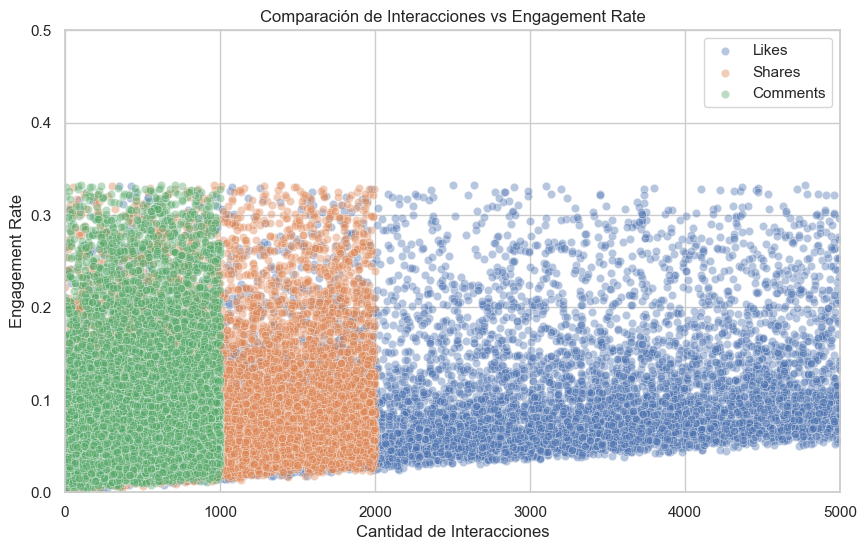

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual
sns.set_theme(style='whitegrid')

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likes_count', y='engagement_rate', data=df, alpha=0.4, label='Likes')
sns.scatterplot(x='shares_count', y='engagement_rate', data=df, alpha=0.4, label='Shares')
sns.scatterplot(x='comments_count', y='engagement_rate', data=df, alpha=0.4, label='Comments')

plt.title('Comparación de Interacciones vs Engagement Rate')
plt.xlabel('Cantidad de Interacciones')
plt.ylabel('Engagement Rate')
plt.legend()
plt.xlim(0, 5000)  # Limitar escala para mejor claridad
plt.ylim(0, 0.5)
plt.show()


### 📌 B.2 — **Análisis** | Impresiones vs Engagement Rate

Queremos saber Si tener mucho alcance (impresiones) se traduce realmente en engagement, o si hay campañas que se ven mucho pero generan poco interés.

En este gráfico se observa una relación inversa clara: a medida que aumentan las impresiones, el engagement rate tiende a disminuir.

Los posteos con menos impresiones (entre 10.000 y 30.000) muestran un engagement más alto, alcanzando valores de hasta 0.30.

En cambio, a partir de las 40.000 impresiones, el engagement se aplana por debajo de 0.1, indicando que mayor alcance no siempre implica mayor interacción proporcional.

Esto puede deberse a campañas masivas que llegan a audiencias amplias pero menos involucradas, o a la saturación de contenido en perfiles con muchos seguidores.
En definitiva, el engagement no crece de forma proporcional al alcance.


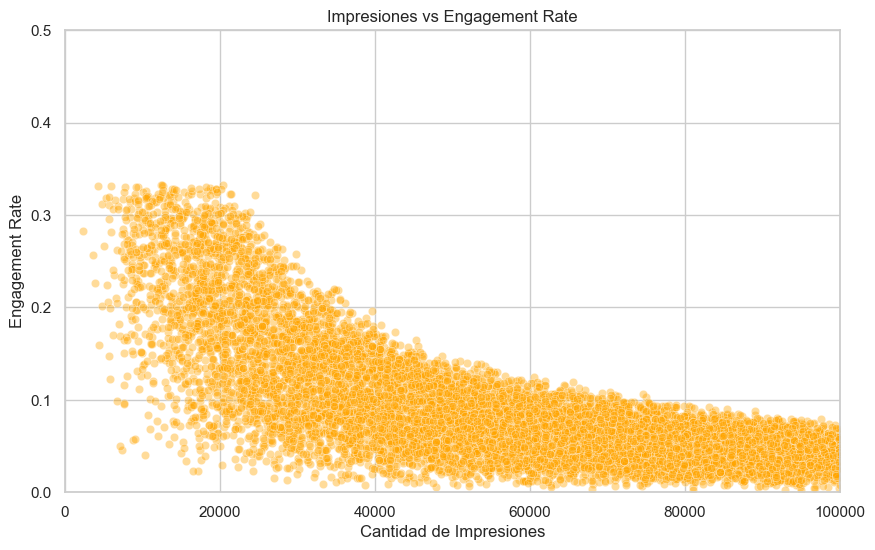

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual
sns.set_theme(style='whitegrid')

# Gráfico de dispersión: impresiones vs engagement rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='impressions', y='engagement_rate', data=df, alpha=0.4, color='orange')

plt.title('Impresiones vs Engagement Rate')
plt.xlabel('Cantidad de Impresiones')
plt.ylabel('Engagement Rate')
plt.xlim(0, 100000)  # Ajuste visual para claridad
plt.ylim(0, 0.5)
plt.show()


### 📌 B.3 — **Análisis** | Relación entre Likes y Shares
Este gráfico compara directamente la cantidad de likes con la cantidad de shares en cada publicación.

Se observa una alta dispersión, sin una tendencia clara ni proporcional entre ambas métricas.

Esto sugiere que los likes no garantizan que un post sea compartido, lo cual puede indicar que las acciones de compartir implican mayor involucramiento emocional o utilidad percibida.

Por lo tanto, si bien los likes son comunes, los shares deben tratarse como una métrica distinta, que responde a otros factores del contenido.

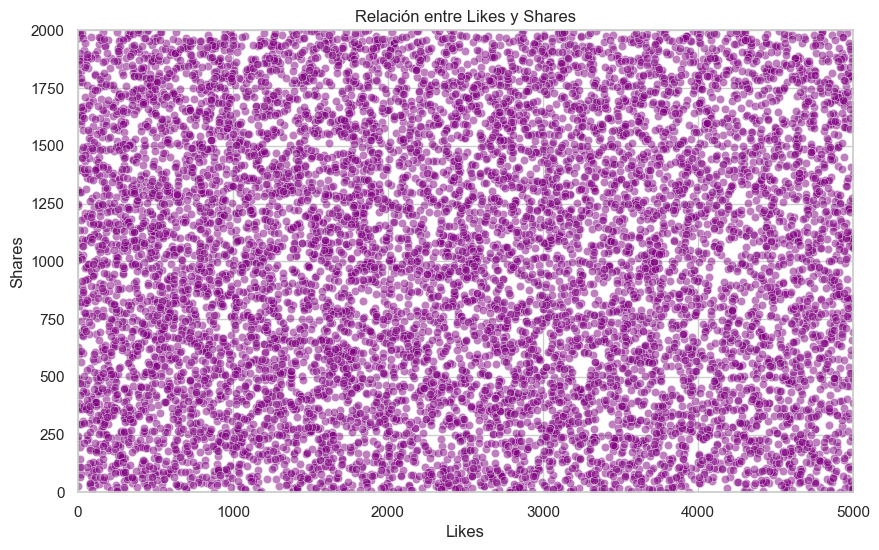

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

# Gráfico de dispersión: Likes vs Shares
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likes_count', y='shares_count', data=df, alpha=0.5, color='purple')

plt.title('Relación entre Likes y Shares')
plt.xlabel('Likes')
plt.ylabel('Shares')
plt.xlim(0, 5000)
plt.ylim(0, 2000)
plt.show()


## **Paso C** Correlacionar — Relaciones Matemáticas entre Métricas
<hr style="border: none; height: 5px; background-color: Violet
;">

#### 📌 C.1 — Matriz de Correlación entre Métricas Numéricas
Se analizó la relación estadística entre variables cuantitativas del dataset.

 Insights clave:
Impresiones vs Engagement Rate: Correlación negativa fuerte (-0.73). A mayor cantidad de impresiones, menor es la tasa de engagement relativa, lo cual es lógico: el alcance masivo no siempre garantiza interacción proporcional.

Likes vs Engagement Rate: Correlación moderada positiva (0.35), lo que indica que los likes tienen impacto, pero no son determinantes.

Shares y Comments: Baja correlación con el engagement rate, lo que refuerza la idea de que su impacto está más ligado al tipo de contenido, no a la cantidad total.

Esta matriz permite detectar relaciones relevantes y posibles variables redundantes o sin impacto directo, fundamentales para futuras decisiones de modelado o visualización.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include='number')

# Calcular matriz de correlación
correlation_matrix = numeric_cols.corr()

# Visualizar como mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación entre Métricas Numéricas')
plt.show()


NameError: name 'df' is not defined

## **Paso D** Destacados  — Top 10 Top 3 
<hr style="border: none; height: 5px; background-color: #006666;"></div>


### **Top 10** | Engagement por país y ciudad
<hr style="border: none; height: 5px; background-color: #006666;"></div>

Los gráficos muestran los países y ciudades con el mayor Engagement Rate promedio en el dataset, permitiendo identificar ubicaciones geográficas clave en términos de rendimiento en redes sociales.

Países: Corea del Sur, España y Emiratos Árabes Unidos lideran el ranking con los valores más altos de engagement.

Ciudades: Madrid, Seúl y Los Ángeles se destacan como las ciudades con mayor participación promedio.

Estos insights permiten priorizar campañas y contenido en mercados geográficos con mejor desempeño y optimizar la segmentación estratégica.

In [19]:
# Mostrar los 10 posteos con mayor engagement rate
top_posts = df[['post_id', 'platform', 'timestamp', 'engagement_rate', 'text_content']].sort_values(by='engagement_rate', ascending=False).head(10)
top_posts


,post_id,platform,timestamp,engagement_rate,text_content
5652,237xlkuevj9v,Twitter,2024-08-23 15:31:22,0.33295,Just saw an ad for Adidas NMD during the Summe...
10336,dvh2vjh5kr8a,Twitter,2025-03-26 00:09:16,0.33277,My one week review of Toyota Tacoma: Returning...
3927,fszbo9jt1ftz,Youtube,2024-10-22 09:38:34,0.33255,Just unboxed my new Apple Watch from Apple. Ex...
758,ccdvi4af3vvf,Youtube,2024-07-09 20:49:37,0.33151,Just saw an ad for Toyota RAV4 during the Cust...
9681,u67hu5nyt6ud,Reddit,2024-05-14 04:04:50,0.33134,"Any advice about Google's Chromebook? #Food, ..."
7772,gi6cm5ena1sz,Facebook,2024-08-31 15:07:30,0.33105,Confused about with my new Neo QLED TV from Sa...
793,tikwkxp6fj44,Twitter,2024-08-05 07:30:23,0.33065,My two days review of Toyota Tundra: Returning...
1299,letz878crjgd,Youtube,2024-10-04 05:27:48,0.33062,Just tried the Nest Hub from Google. Not worth...
9345,syw0lc55ku3k,Reddit,2024-09-07 06:18:33,0.32986,Attended the Coca-Cola GlobalCampaign event ye...
5646,196szfe40loq,Reddit,2025-01-26 14:27:10,0.32976,My two days review of Microsoft Surface Laptop...


C:\Users\Bruger\AppData\Local\Temp\ipykernel_17208\190470368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_country.values, y=engagement_by_country.index, palette='crest')


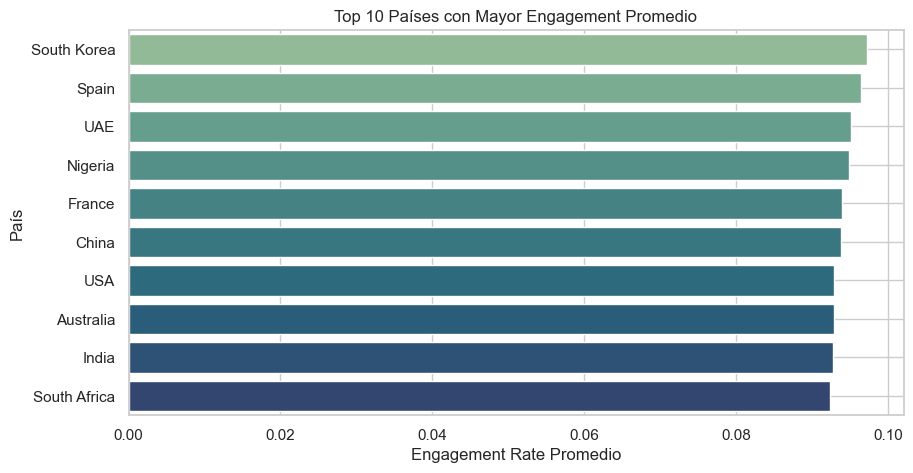

In [ ]:

engagement_by_country = df.groupby('country')['engagement_rate'].mean().sort_values(ascending=False).head(10)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=engagement_by_country.values, y=engagement_by_country.index, palette='crest')
plt.title('Top 10 Países con Mayor Engagement Promedio')
plt.xlabel('Engagement Rate Promedio')
plt.ylabel('País')
plt.grid(True)
plt.show()


C:\Users\Bruger\AppData\Local\Temp\ipykernel_17208\2128817830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_country.values, y=engagement_by_country.index, palette='crest')


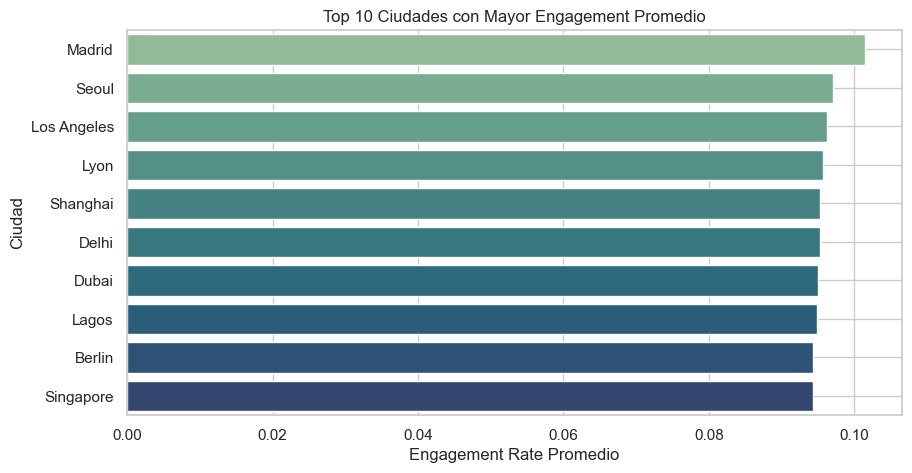

In [ ]:

engagement_by_country = df.groupby('city')['engagement_rate'].mean().sort_values(ascending=False).head(10)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=engagement_by_country.values, y=engagement_by_country.index, palette='crest')
plt.title('Top 10 Ciudades con Mayor Engagement Promedio')
plt.xlabel('Engagement Rate Promedio')
plt.ylabel('Ciudad')
plt.grid(True)
plt.show()


### **Top 3** | Idiomas por cada Pais con mas Engagement
<hr style="border: none; height: 5px; background-color: #006666;"></div>

Este gráfico representa los tres idiomas más efectivos en términos de engagement rate promedio para cada uno de los 10 países con mejor rendimiento.

Se utilizó un promedio de engagement por idioma dentro de cada país.

Se observa que el idioma dominante varía notablemente según la región.

Esta visualización permite detectar preferencias lingüísticas por país, facilitando la toma de decisiones para segmentaciones de campañas.

👉 Ideal para adaptar contenidos multilingües según las audiencias geográficas más activas.

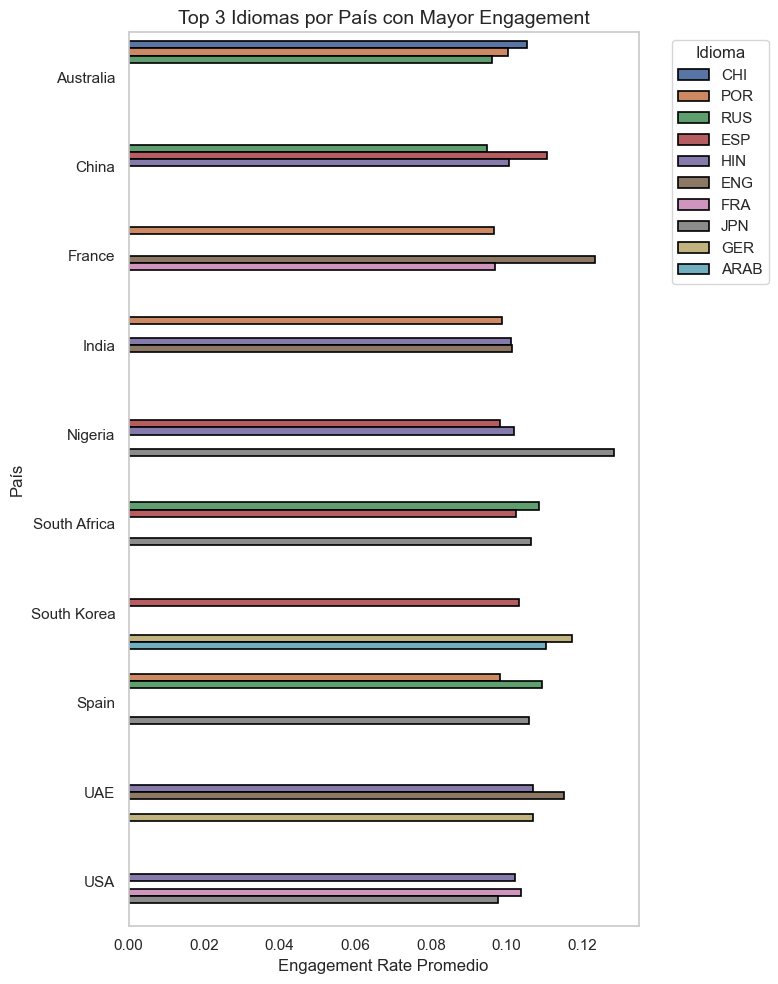

In [25]:
plt.figure(figsize=(8, 10))  # Más alto que ancho para hacerlo vertical

sns.barplot(
    data=top3_langs_per_country,
    y='country',  # Eje Y con países
    x='engagement_rate',  # Engagement en eje X
    hue='language',
    edgecolor='black',
    linewidth=1.2
)

plt.title('Top 3 Idiomas por País con Mayor Engagement', fontsize=14)
plt.xlabel('Engagement Rate Promedio', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.grid(False)  # Quitar líneas de fondo
plt.legend(title='Idioma', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera
plt.tight_layout()
plt.show()
